<a href="https://colab.research.google.com/github/nachopodesta/dsa-utn/blob/main/C2_Outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_moons, make_blobs
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope

LINK DEL DATASET: https://drive.google.com/file/d/1pkrX1PUmYR-N-4nILcLprXUwHuYZEwyr/view?usp=sharing

# Local Outlier Factor

In [2]:
data = pd.read_csv('synthetic_test_1.csv')

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,outlier
0,0.539521,0.006844,0.379683,0.915896,0.708540,0.606755,0.504256,0.941473,0.019866,0.092027,yes
1,0.114757,0.269462,0.911566,0.441826,0.452097,0.940763,0.913952,0.952670,0.523607,0.636719,yes
2,0.357312,0.955679,0.739988,0.682353,0.637739,0.462499,0.887642,0.664132,0.572974,0.953634,yes
3,0.676398,0.514887,0.895753,0.176415,0.214757,0.741506,0.894564,0.148374,0.122150,0.967965,yes
4,0.434828,0.965319,0.691517,0.290982,0.848729,0.821134,0.929108,0.958951,0.331384,0.345895,yes
...,...,...,...,...,...,...,...,...,...,...,...
295,0.305055,0.656837,0.331665,0.822525,0.907127,0.882276,0.855732,0.584786,0.808640,0.242762,no
296,0.812627,0.864258,0.616604,0.167966,0.811223,0.938071,0.418462,0.472306,0.348347,0.671129,no
297,0.250967,0.138627,0.919703,0.461234,0.886555,0.869888,0.800908,0.530324,0.779433,0.234952,no
298,0.502436,0.936820,0.580062,0.540773,0.151995,0.059452,0.225220,0.242755,0.279385,0.538755,no


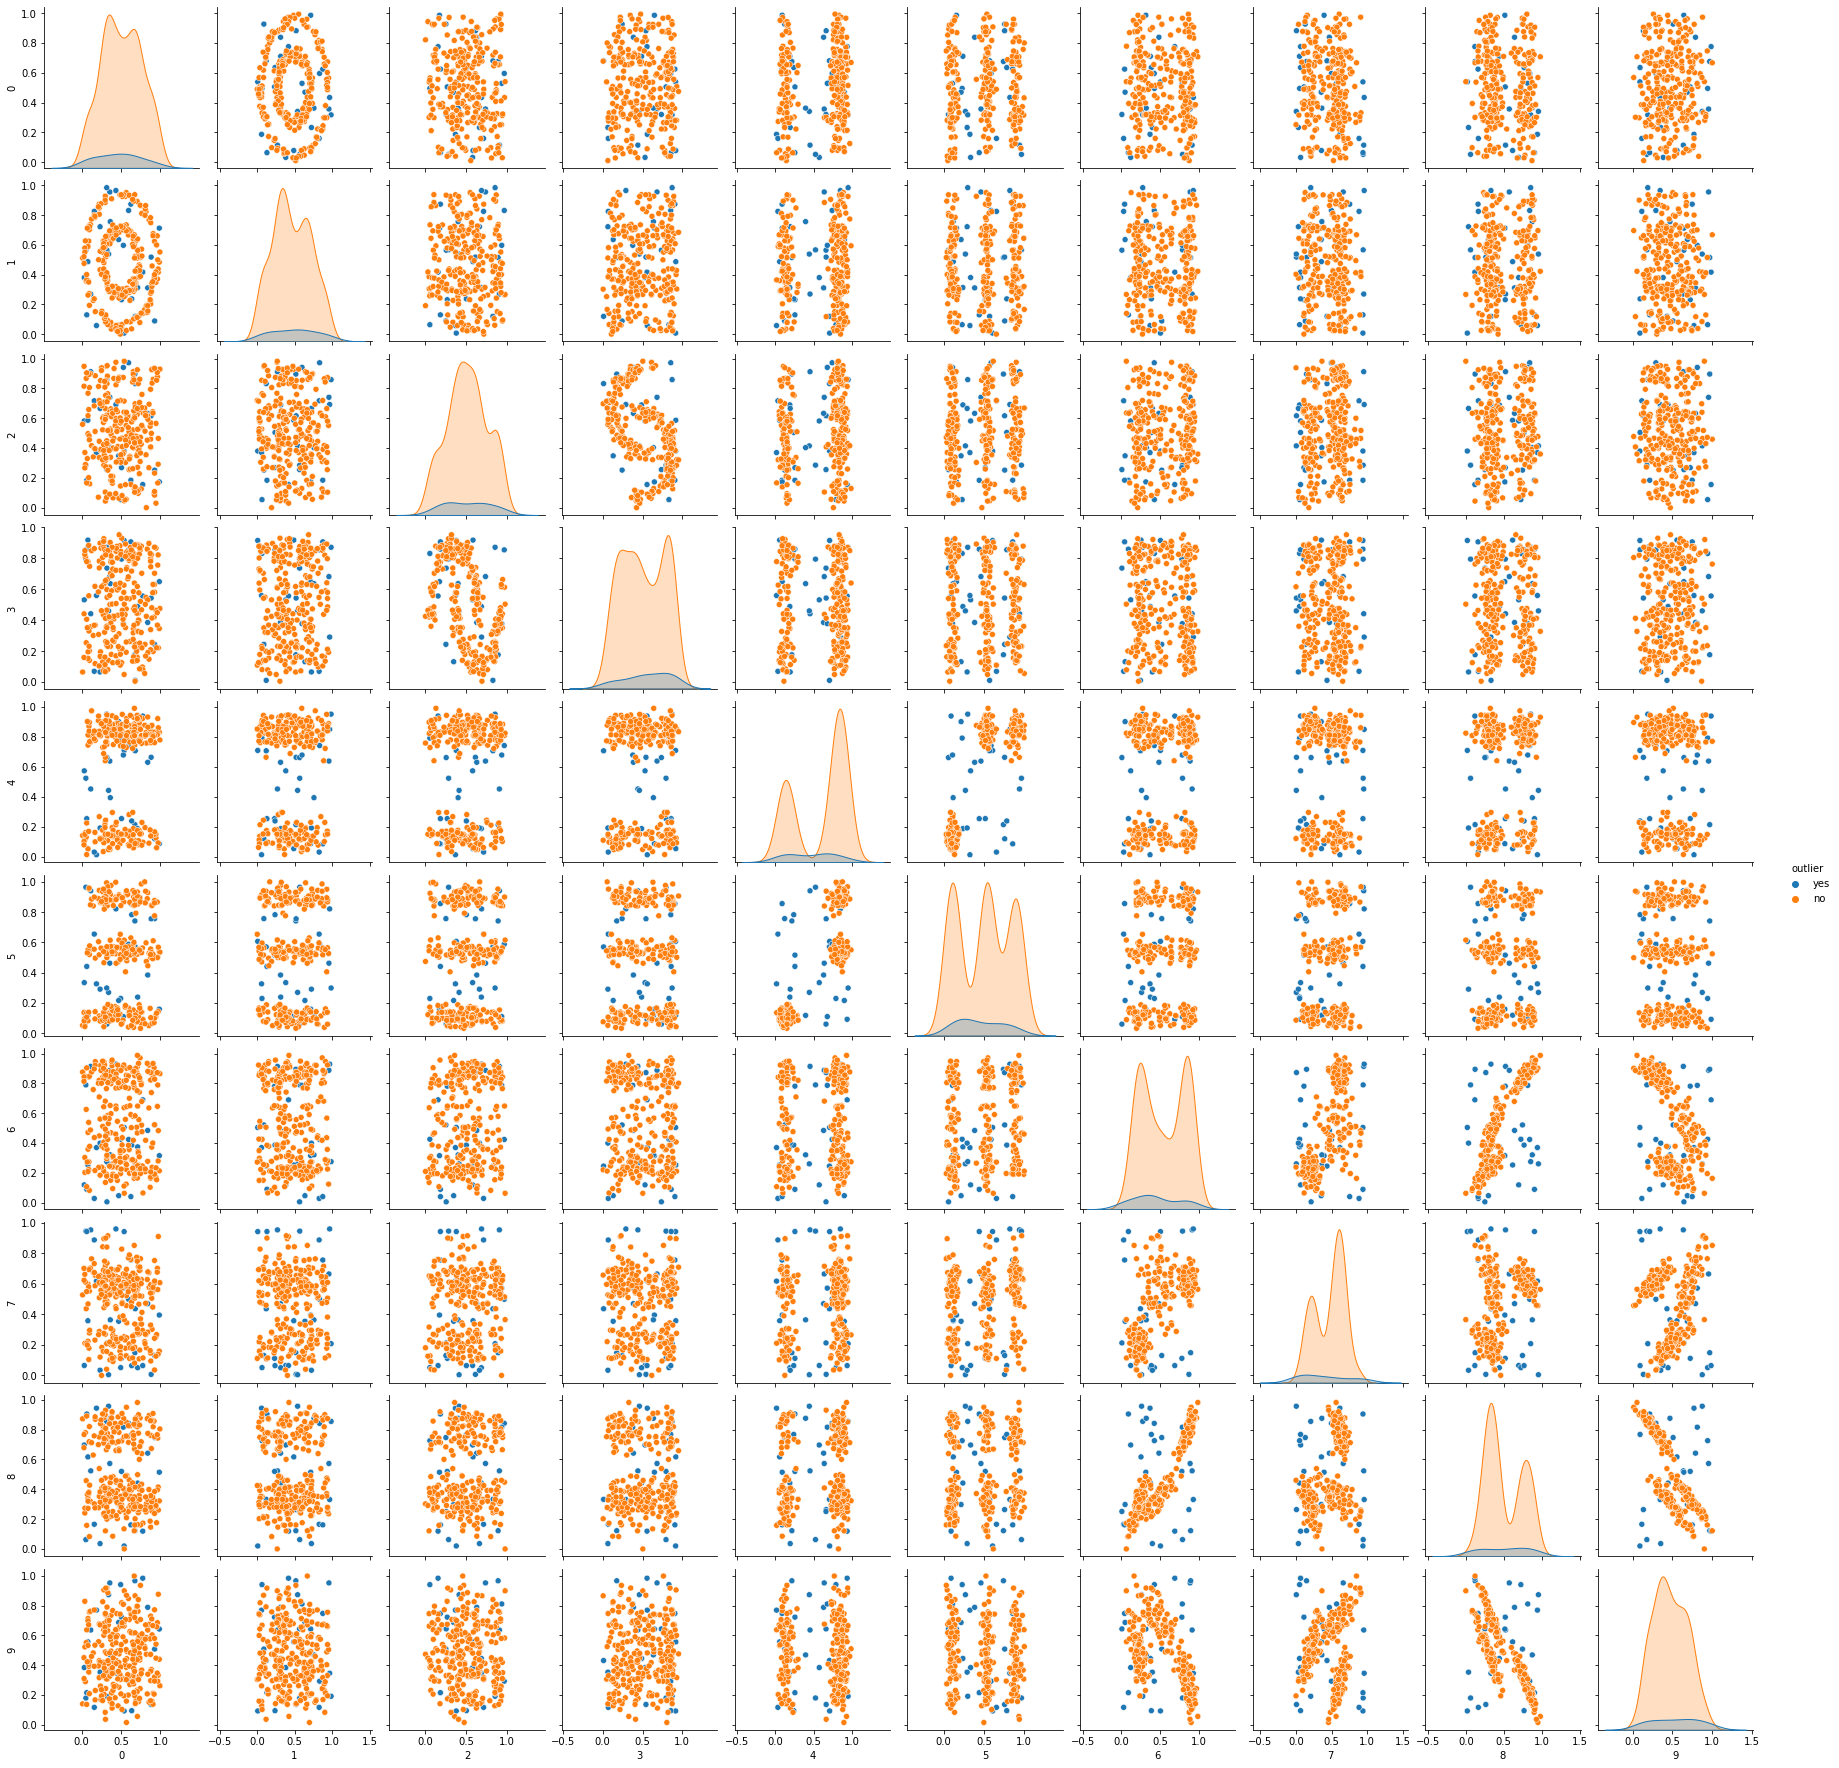

In [4]:
sns.pairplot(data, hue='outlier')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



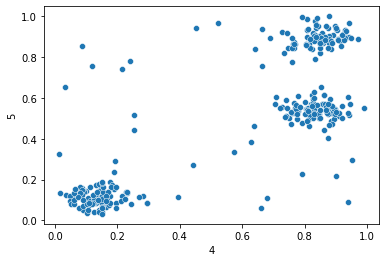

In [18]:
sns.scatterplot(data["4"], data["5"])

In [19]:
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.07)
y_pred = clf.fit_predict(data[["4","5"]])

In [20]:
y_pred

array([ 1, -1, -1, -1,  1, -1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [21]:
subdataset = data[["4","5"]]
subdataset['Outlier'] = y_pred

x_out = subdataset[subdataset.Outlier == -1].iloc[:, 0]
y_out = subdataset[subdataset.Outlier == -1].iloc[:, 1]

x_in = subdataset[subdataset.Outlier == 1].iloc[:, 0]
y_in = subdataset[subdataset.Outlier == 1].iloc[:, 1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [22]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x_out, y=y_out,
                    mode='markers',
                    name='Outliers'))

fig.add_trace(go.Scatter(x=x_in, y=y_in,
                    mode='markers',
                    name='Inliers'))

fig.show()

Eliminamos los outliers del dataset

In [23]:
subdataset_clean = subdataset.loc[subdataset.Outlier == 1, :]

In [24]:
outlier_amount = subdataset.shape[0] - subdataset_clean.shape[0] 

In [25]:
print("Hemos eliminado", outlier_amount, "outliers")

Hemos eliminado 21 outliers


# Isolation Forest

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



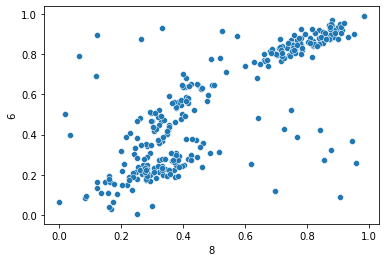

In [26]:
sns.scatterplot(data["8"], data["6"])

## 2 Variables

In [32]:
subdataset2 = data.loc[:, ["8","6"]]

clf=IsolationForest(contamination=0.1, n_jobs=-1, random_state=42)
clf.fit(subdataset2.values)
pred = clf.predict(subdataset2.values)
subdataset2['Outlier']=pred

outliers=subdataset2[subdataset2['Outlier']==-1]
inliers = subdataset2[subdataset2['Outlier']==1]
outlier_index=list(outliers.index)

#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
print(subdataset2['Outlier'].value_counts())

x_out = subdataset2[subdataset2.Outlier == -1].iloc[:, 0]
y_out = subdataset2[subdataset2.Outlier == -1].iloc[:, 1]

x_in = subdataset2[subdataset2.Outlier == 1].iloc[:, 0]
y_in = subdataset2[subdataset2.Outlier == 1].iloc[:, 1]

 1    270
-1     30
Name: Outlier, dtype: int64


In [33]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x_out, y=y_out,
                    mode='markers',
                    name='Outliers'))

fig.add_trace(go.Scatter(x=x_in, y=y_in,
                    mode='markers',
                    name='Inliers'))

fig.show()

## 3 Variables

In [34]:
subdataset3 = data.loc[:, ["8","6","9"]]

clf=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.08, 
                    max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
clf.fit(subdataset3.values)
pred = clf.predict(subdataset3.values)
subdataset3['Outlier']=pred

outliers=subdataset3[subdataset3['Outlier']==-1]
inliers = subdataset3[subdataset3['Outlier']==1]
outlier_index=list(outliers.index)

#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
subdataset3['Outlier'].value_counts()

x_out = subdataset3[subdataset3.Outlier == -1].iloc[:, 0]
y_out = subdataset3[subdataset3.Outlier == -1].iloc[:, 1]
z_out = subdataset3[subdataset3.Outlier == -1].iloc[:, 2]

x_in = subdataset3[subdataset3.Outlier == 1].iloc[:, 0]
y_in = subdataset3[subdataset3.Outlier == 1].iloc[:, 1]
z_in = subdataset3[subdataset3.Outlier == 1].iloc[:, 2]

In [44]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter3d(x=x_out, y=y_out, z=z_out,
                    mode='markers',
                    name='Outliers',
                    marker=dict(symbol='cross', color='red')))

fig.add_trace(go.Scatter3d(x=x_in, y=y_in, z=z_in,
                    mode='markers',
                    name='Inliers',
                    marker=dict(symbol='circle', color='blue')))

fig.show()

# Elliptic Envelope

In [37]:
subdataset4 = data.loc[:, ["8","6"]]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



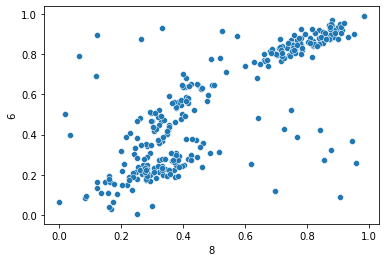

In [38]:
sns.scatterplot(data["8"], data["6"])

In [39]:
model = EllipticEnvelope(random_state= 1, contamination=0.1)

In [40]:
subdataset4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   8       300 non-null    float64
 1   6       300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


In [41]:
model.fit(subdataset4)

EllipticEnvelope(random_state=1)

In [42]:
pred = model.predict(subdataset4)
subdataset4['Outlier']=pred

outliers=subdataset4[subdataset4['Outlier']==-1]
inliers = subdataset4[subdataset4['Outlier']==1]
outlier_index=list(outliers.index)

#print(outlier_index)
#Find the number of anomalies and normal points here points classified -1 are anomalous
subdataset4['Outlier'].value_counts()

x_out = subdataset4[subdataset4.Outlier == -1].iloc[:, 0]
y_out = subdataset4[subdataset4.Outlier == -1].iloc[:, 1]

x_in = subdataset4[subdataset4.Outlier == 1].iloc[:, 0]
y_in = subdataset4[subdataset4.Outlier == 1].iloc[:, 1]

In [43]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=x_out, y=y_out,
                    mode='markers',
                    name='Outliers'))

fig.add_trace(go.Scatter(x=x_in, y=y_in,
                    mode='markers',
                    name='Inliers'))

fig.show()

## Encontrar el mejor algoritmo de deteccion de Outliers con Ap. No Sup para:
1. Una distribucion de 3D
2. Una distribucion de 2D

Pueden tomar este dataset, o cualquier otro.